# **Lab: Gold Prediction**

This tutorial demonstrates gold prediction using three different models including decision tree, naive bayes, and support vector machines. This lab will help you grasp an idea of how could you approach the problem and recall your python implementation skill.

## **Step 1: Import Libraries**

All the necessary libraries are listed below.

In [1]:
import pandas as pd             # provide a table object and data analysis tools
import numpy as np              # provide an array object and mathematical operations

import matplotlib.pyplot as plt # provide visualization tools
%matplotlib inline
import seaborn as sns           # provide visualization tools

from sklearn.model_selection import train_test_split  # provide hold-out method
from sklearn.tree import DecisionTreeClassifier       # provide decision tree model
from sklearn.naive_bayes import GaussianNB            # provide naive bayes model
from sklearn.svm import SVC                           # provide support vector machines model

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report # provide evaluation metrics

import pickle                   # provide saving and loading tool

## **Step 2: Import the Dataset**

We will import the dataset directly via `drive.mount()` function which is the simplest approach to connect to the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here, change the destination paths to your paths where you kept your dataset.

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/ML, CS-KMITL, 2-2566/Labs/Lab 2 - Gold Prediction/gold_training.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ML, CS-KMITL, 2-2566/Labs/Lab 2 - Gold Prediction/gold_testing.csv')

## **Step 3: Explore the Data**

### **Step 3.1: Get an Overview**

We can use `DataFrame.head()` to view the top 5 rows.

In [4]:
train_data.head()

,Date,^TYX,^XAU,CD,EM,^RUT,^GDAXI,^TNX,GC Trend
0,02/03/1997,6.71,110.13,0.7464,94.560,366.75,3138.0,6.39,UP
1,02/10/1997,6.53,114.64,0.7401,94.595,369.13,3248.2,6.26,UP
2,02/18/1997,6.63,118.53,0.7390,94.600,366.37,3184.1,6.35,UP
3,02/24/1997,6.79,122.46,0.7348,94.600,360.05,3259.6,6.53,UP
4,03/03/1997,6.82,114.21,0.7319,94.535,365.46,3376.2,6.55,UP


In [5]:
test_data.head()

,Date,^TYX,^XAU,CD,EM,^RUT,^GDAXI,^TNX
0,01/03/2007,4.74,133.04,0.8709,94.6500,775.87,6596.92,4.65
1,01/08/2007,4.86,134.78,0.8712,94.6750,794.26,6593.09,4.77
2,01/16/2007,4.86,133.12,0.8639,94.6775,785.16,6705.17,4.77
3,01/22/2007,4.98,138.65,0.8656,94.6800,788.14,6747.17,4.88
4,01/29/2007,4.93,138.88,0.8595,94.6775,809.42,6690.34,4.83


We can use `DataFrame.describe()` to view statistical details.

In [6]:
train_data.describe()

,^TYX,^XAU,CD,EM,^RUT,^GDAXI,^TNX
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,5.397946,83.192035,0.721006,96.048244,509.610601,4888.968779,4.998236
std,0.629139,26.372572,0.079278,1.892535,111.800114,1214.726538,0.818795
min,4.170000,41.850000,0.620300,93.170000,318.400000,2403.190000,3.100000
25%,4.907500,63.200000,0.657125,94.375000,428.317500,3979.075000,4.287500
50%,5.350000,76.850000,0.691000,95.214350,482.520000,4877.390000,4.890000
75%,5.825000,98.522500,0.763800,98.145625,580.765000,5709.430000,5.652500
max,7.160000,161.890000,0.909800,98.992500,792.710000,7975.950000,6.960000


In [7]:
test_data.describe()

,^TYX,^XAU,CD,EM,^RUT,^GDAXI,^TNX
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.850000,137.981250,0.860863,94.675000,800.527500,6760.828750,4.756250
std,0.079462,3.898166,0.008371,0.010264,17.420459,141.400337,0.078547
min,4.740000,133.040000,0.849600,94.650000,775.870000,6593.090000,4.650000
25%,4.787500,134.365000,0.853600,94.676875,787.395000,6666.985000,4.687500
50%,4.860000,138.765000,0.861700,94.678750,800.685000,6726.170000,4.770000
75%,4.877500,140.860000,0.866925,94.680000,811.602500,6892.097500,4.792500
max,4.980000,143.120000,0.871200,94.680000,826.110000,6957.070000,4.880000


We can use `DataFrame.info()` to print a concise summary of a dataframe.

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      516 non-null    object 
 1   ^TYX      516 non-null    float64
 2   ^XAU      516 non-null    float64
 3   CD        516 non-null    float64
 4   EM        516 non-null    float64
 5   ^RUT      516 non-null    float64
 6   ^GDAXI    516 non-null    float64
 7   ^TNX      516 non-null    float64
 8   GC Trend  516 non-null    object 
dtypes: float64(7), object(2)
memory usage: 36.4+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8 non-null      object 
 1   ^TYX    8 non-null      float64
 2   ^XAU    8 non-null      float64
 3   CD      8 non-null      float64
 4   EM      8 non-null      float64
 5   ^RUT    8 non-null      float64
 6   ^GDAXI  8 non-null      float64
 7   ^TNX    8 non-null      float64
dtypes: float64(7), object(1)
memory usage: 640.0+ bytes


### **Step 3.2: Check for Null or Empty Column**

Here, if we want to ensure that there is no null value then we commonly use `DataFrame.isnull()` or `DataFrame.isna()` to detect null value.

In [10]:
train_data.isnull().sum()

Date        0
^TYX        0
^XAU        0
CD          0
EM          0
^RUT        0
^GDAXI      0
^TNX        0
GC Trend    0
dtype: int64

In [11]:
test_data.isnull().sum()

Date      0
^TYX      0
^XAU      0
CD        0
EM        0
^RUT      0
^GDAXI    0
^TNX      0
dtype: int64

### **Step 3.3: Check if the Data is Balanced**

It is a good practice to always check for imbalanced data to ensure that the training and validation steps will goes correctly using `DataFrame.value_counts()`.

In [12]:
train_data.columns = [column.replace(' ', '_') for column in train_data.columns]

In [13]:
train_data.head()

,Date,^TYX,^XAU,CD,EM,^RUT,^GDAXI,^TNX,GC_Trend
0,02/03/1997,6.71,110.13,0.7464,94.560,366.75,3138.0,6.39,UP
1,02/10/1997,6.53,114.64,0.7401,94.595,369.13,3248.2,6.26,UP
2,02/18/1997,6.63,118.53,0.7390,94.600,366.37,3184.1,6.35,UP
3,02/24/1997,6.79,122.46,0.7348,94.600,360.05,3259.6,6.53,UP
4,03/03/1997,6.82,114.21,0.7319,94.535,365.46,3376.2,6.55,UP


In [14]:
train_data.GC_Trend.value_counts()

DOWN    274
UP      242
Name: GC_Trend, dtype: int64

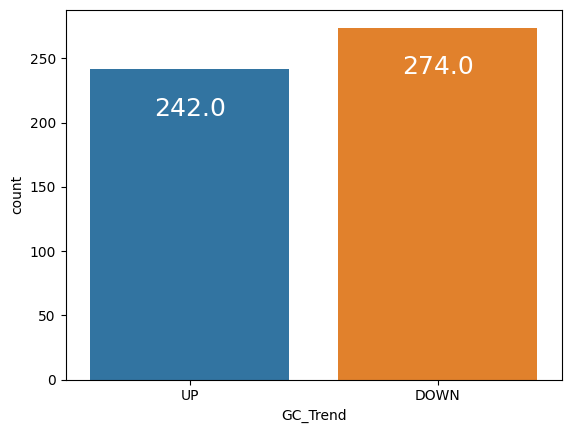

In [15]:
ax = sns.countplot(x='GC_Trend', data=train_data)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.40, p.get_height()), ha='center', va='top', color='white', size=18)

plt.show()

### **Step 3.4: Undersampling the Majority Class**

There are two ways to dealing with imbalanced data: undersampling and oversampling.

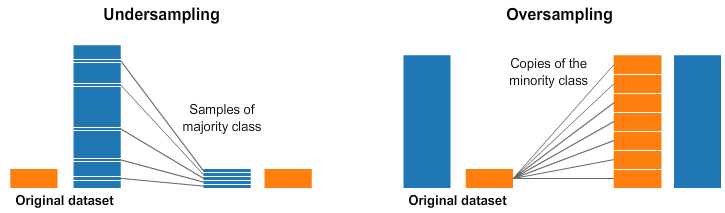

Let's do undersampling as we have a decent amount of data and it does not significantly affect our model if we take some of the data out.

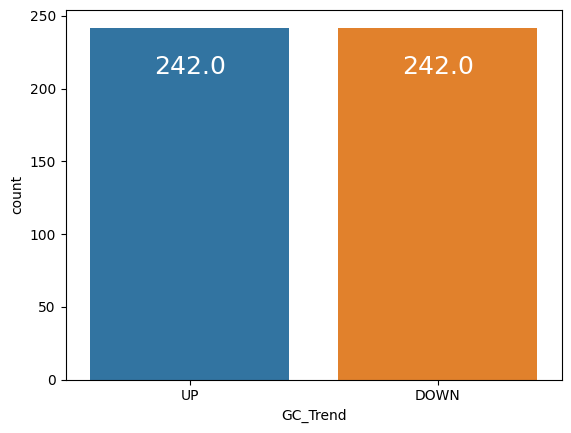

In [16]:
# shuffle the training dataset
shuffled_train_data = train_data.sample(frac=1)

# put all the UP class in the separate dataset
up_data = shuffled_train_data.loc[shuffled_train_data['GC_Trend'] == 'UP']

# randomly select 242 classes from the DOWN class (majority class)
down_data = shuffled_train_data.loc[shuffled_train_data['GC_Trend'] == 'DOWN'].sample(n=242)

# concatenate both dataframes again
balanced_train_data = pd.concat([up_data, down_data])

# plot the dataset after the undersampling
ax = sns.countplot(x='GC_Trend', data=balanced_train_data)

for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.40, p.get_height()), ha='center', va='top', color='white', size=18)

plt.show()

Now, it is balanced.

## **Step 4: Data Preparation**

Let's drop the unnecessary column such as *Date* column

In [17]:
train_data = train_data.drop('Date', axis=1)

In [18]:
train_data.head()

,^TYX,^XAU,CD,EM,^RUT,^GDAXI,^TNX,GC_Trend
0,6.71,110.13,0.7464,94.560,366.75,3138.0,6.39,UP
1,6.53,114.64,0.7401,94.595,369.13,3248.2,6.26,UP
2,6.63,118.53,0.7390,94.600,366.37,3184.1,6.35,UP
3,6.79,122.46,0.7348,94.600,360.05,3259.6,6.53,UP
4,6.82,114.21,0.7319,94.535,365.46,3376.2,6.55,UP


## **Step 5: Modeling**

In this section, we will conduct experiments with decision tree, naive bayes, and support vector machines.

### **Step 5.1: Hold-out Validation**

In [19]:
y = train_data.GC_Trend
X = train_data.drop('GC_Trend', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

### **Step 5.2: Build, Train and Evaluate a Decision Tree (Option 1)**

In [20]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
dt_predicted = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predicted)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
print('Test Accuracy: {:.2f}%'.format(dt_acc * 100))
print('Confusion Matrix: \n{}'.format(dt_conf_matrix))
print(classification_report(y_test, dt_predicted))

Test Accuracy: 94.23%
Confusion Matrix: 
[[51  3]
 [ 3 47]]
              precision    recall  f1-score   support

        DOWN       0.94      0.94      0.94        54
          UP       0.94      0.94      0.94        50

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



### **Step 5.2: Build, Train and Evaluate a Naive Bayes (Option 2)**

In [22]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [23]:
nb_predicted = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_predicted)
nb_conf_matrix = confusion_matrix(y_test, nb_predicted)
print('Test Accuracy: {:.2f}%'.format(nb_acc * 100))
print('Confusion Matrix: \n{}'.format(nb_conf_matrix))
print(classification_report(y_test, nb_predicted))

Test Accuracy: 91.35%
Confusion Matrix: 
[[48  6]
 [ 3 47]]
              precision    recall  f1-score   support

        DOWN       0.94      0.89      0.91        54
          UP       0.89      0.94      0.91        50

    accuracy                           0.91       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.92      0.91      0.91       104



### **Step 5.2: Build, Train and Evaluate a Support Vector Machines (Option 3)**

In [24]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [25]:
svc_predicted = svc_model.predict(X_test)
svc_acc = accuracy_score(y_test, svc_predicted)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
print('Test Accuracy: {:.2f}%'.format(svc_acc * 100))
print('Confusion Matrix: \n{}'.format(svc_conf_matrix))
print(classification_report(y_test, svc_predicted))

Test Accuracy: 74.04%
Confusion Matrix: 
[[42 12]
 [15 35]]
              precision    recall  f1-score   support

        DOWN       0.74      0.78      0.76        54
          UP       0.74      0.70      0.72        50

    accuracy                           0.74       104
   macro avg       0.74      0.74      0.74       104
weighted avg       0.74      0.74      0.74       104



## **Step 6: Model Comparison**

In [26]:
model_eval = pd.DataFrame({'Model': ['Decision Tree', 'Naive Bayes', 'Support Vector Machines'],
                           'Accuracy': [dt_acc * 100, nb_acc * 100, svc_acc * 100]})
model_eval

,Model,Accuracy
0,Decision Tree,94.230769
1,Naive Bayes,91.346154
2,Support Vector Machines,74.038462


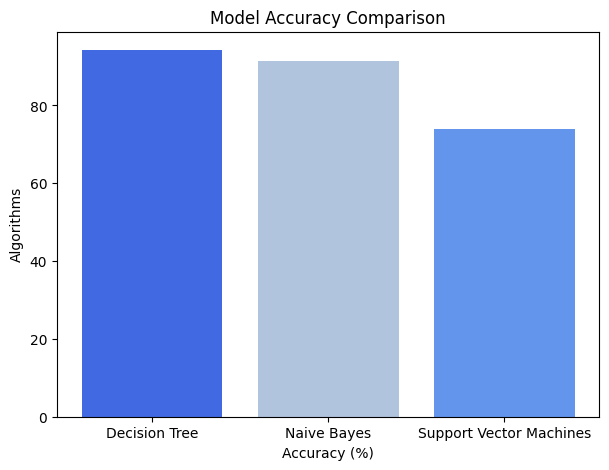

In [27]:
colors = ['royalblue', 'lightsteelblue', 'cornflowerblue']
plt.figure(figsize=(7, 5))
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy (%)")
plt.ylabel("Algorithms")
plt.bar(model_eval['Model'], model_eval['Accuracy'], color = colors)
plt.show()

## **Step 7: Save & Use the Model**

In the near future, you might want to deploy your machine learning model to production. `pickle()` function is one of the steps of deployment process. it is able to save your machine learning model, and then you can use that with web app, mobil app, or dekstop app afterwards.



### **Step 7.1: Save the Model**

In [28]:
file_name = 'decision_tree_model.sav'
pickle.dump(dt_model, open(file_name, 'wb'))

### **Step 7.2: Load & Use the Model**

In [29]:
loaded_model = pickle.load(open(file_name, 'rb'))

In [30]:
loaded_model_predicted = loaded_model.predict(X_test)
loaded_model_acc = accuracy_score(y_test, loaded_model_predicted)
print('Test Accuracy: {:.2f}%'.format(loaded_model_acc * 100))

Test Accuracy: 94.23%
